In [5]:
from pathlib import Path
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
ds = xr.open_dataset("/Users/brianpm/Downloads/sst.mnmean.nc")

In [12]:
ds['sst']

<xarray.DataArray 'sst' (time: 487, lat: 180, lon: 360)>
[31557600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2022-06-01
Attributes:
    long_name:             Monthly Mean of Sea Surface Temperature
    unpacked_valid_range:  [-5. 40.]
    actual_range:          [-1.7999996 35.56862  ]
    units:                 degC
    precision:             2
    var_desc:              Sea Surface Temperature
    dataset:               NOAA Optimum Interpolation (OI) SST V2
    level_desc:            Surface
    statistic:             Mean
    parent_stat:           Weekly Mean
    standard_name:         sea_surface_temperature
    cell_methods:          time: mean (monthly from weekly values interpolate...
    valid_range:           [-500 4000]

In [6]:
loc = Path("/Users/brianpm/Dropbox/Data")
ds2 = xr.open_dataset(loc/"NOAAGlobalTemp_v5.0.0_gridded_s188001_e201906_c20190710T133355.nc")

In [7]:
ds2

<xarray.Dataset>
Dimensions:  (time: 1674, lat: 36, lon: 72, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 ... 2019-06-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (time, z, lat, lon) float32 ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P139Y6M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2019-07-10T17:33:56Z
    date_issued:                     2019-07-10T17:33:56Z

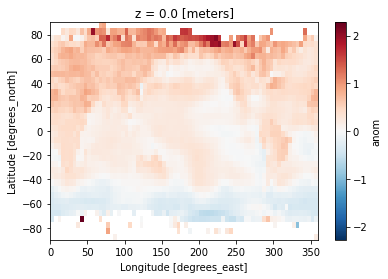

In [11]:
ds2['anom'].sel(time=slice("1990-01-01","2015-12-31")).mean(dim='time').squeeze().plot.pcolormesh()

In [15]:
ds3 = xr.open_mfdataset("/Users/brianpm/Dropbox/Data/ersst/*.nc", use_cftime=True, decode_times=False)

In [19]:
t0 = xr.decode_cf(ds3)
t0['time']

<xarray.DataArray 'time' (time: 175)>
array([cftime.Datetime360Day(2007, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 1, 27, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 1, 58, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 2, 27, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 2, 58, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 3, 28, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 3, 59, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 4, 29, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 5, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 5, 31, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 6, 1, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 6, 32, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 7, 2, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 7, 33, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 8, 4, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 8, 32, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 9, 3, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 9, 33, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 10, 4, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 10, 34, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 11, 5, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 11, 36, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 12, 6, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 12, 37, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 13, 7, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 13, 38, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 14, 9, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 14, 37, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 15, 8, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 15, 38, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 16, 9, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 16, 39, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 17, 10, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 17, 41, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 18, 11, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 18, 42, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 19, 12, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 19, 43, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 20, 14, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 20, 42, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 21, 13, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 21, 43, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 22, 14, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 22, 44, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 23, 15, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 10, 23, 46, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 11, 0, 16, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 11, 0, 47, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 11, 1, 17, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 11, 1, 48, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 11, 2, 19, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2008, 1, 11, 2, 48, 0, 0, has_year_zero=Tr

In [25]:
loc2 = Path("/Users/brianpm/Dropbox/Data/ersst")
fils2 = sorted(list(loc2.glob("*.nc")))
print(len(fils2) / 12)  # n years
ds3a = xr.open_mfdataset(fils2, decode_times=False)

168.5


In [28]:

dslst = [xr.open_dataset(i) for i in fils2]


In [30]:
dslst[0]['time']

<xarray.DataArray 'time' (time: 1)>
array([cftime.Datetime360Day(1854, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1854-01-01 00:00:00
Attributes:
    long_name:      Start time of month
    standard_name:  time
    axis:           T
    delta_t:        0000-01-00
    avg_period:     0000-01-00

In [53]:
dslst[-175]['time']

<xarray.DataArray 'time' (time: 1)>
array([cftime.Datetime360Day(2007, 12, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2007-12-01 00:00:00
Attributes:
    long_name:      Start time of month
    standard_name:  time
    axis:           T
    delta_t:        0000-01-00
    avg_period:     0000-01-00

In [55]:
ds3b = xr.open_mfdataset(fils2[0:-175])

In [57]:
avg = ds3b.resample(time='QS-DEC').mean()

In [62]:
avg_djf = avg.isel(time = (avg['time'].dt.month == 12) )

In [66]:
avg['time']

<xarray.DataArray 'time' (time: 616)>
array([cftime.Datetime360Day(1853, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1854, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1854, 6, 1, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.Datetime360Day(2007, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2007, 6, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2007, 9, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1853-12-01 00:00:00 ... 2007-09-01 00:00:00